<h1>3. 우리 기업의 고객은 왜 떠나갈까?</h1>

이번 분석을 위해서는 지금까지의 **판매데이터(sales_data)**와 **고객정보 데이터(customer_data)** 등 <br>
두 개의 데이터가 필요합니다.<br>
그리고 두 데이터를 하나로 결합해서 판매량에 영향을 미치고 있는 고객 정보 요소를 도출해야 합니다.<br>

먼저 데이터 분석을 위해 필요한 라이브러리를 호출하도록 하겠습니다.<br>

In [6]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [7]:
# 다음으로 Data Server Room에서 전달받은 두 데이터를 불러오겠습니다.

# sales_data, customer_data 변수를 만들고 각 데이터 값을 할당
sales_data = pd.read_csv('~/aiffel/data_analysis_basic/data/sales_7.csv')
customer_data = pd.read_csv('~/aiffel/data_analysis_basic/data/customer_7.csv')

# sales_data.head()
# customer_data.head()

customer_data.info()
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    99845 non-null  object
 1   Name           99845 non-null  object
 2   Nickname       99845 non-null  object
 3   Password       99845 non-null  object
 4   Email          99845 non-null  object
 5   Birth          99845 non-null  object
 6   Gender         99845 non-null  object
 7   C.P.           99845 non-null  object
 8   MobileCompany  99845 non-null  object
 9   OS             99845 non-null  object
dtypes: object(10)
memory usage: 7.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99845 entries, 0 to 99844
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   install      99845 non-null  object
 1   Time_stamp   99845 non-null  object
 2   Game_Name    99845 non-null  object
 3   Status       998

<h4>지금까지의 Data는 3월까지의 Data이므로 별도로 관리하겠습니다. </h4><br>
merge()를 이용해 두 개의 원자료(raw data)를 결합합니다.

In [8]:
# sales_data와 customer_data를 Customer_ID열을 기준으로 합치고 customer_03 변수에 할당
customer_03 = pd.merge(sales_data, customer_data, on="Customer_ID")
customer_03.head()

,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS
0,2022-01-08,2022-02-05,MineGround,play,4900,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS
1,2022-01-05,2022-02-17,MineGround,play,29900,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS
2,2022-01-29,2022-02-06,MineGround,play,4900,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android
3,2022-01-09,2022-02-05,MineGround,play,900,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS
4,2022-01-08,2022-02-01,MineGround,play,900,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android


<h2>4월분 Customer Data를 한번 살펴보도록 하겠습니다.</h2>
여러분이 직접 customer_04 변수를 만들어 customer_04 값을 할당한 후, 상위 5개의 데이터를 확인해 보세요

Data Server Room에서 보낸 4월 고객 데이터는 친절하게도 4월 sales data도 합쳐져 있습니다. 4월 전체 고객은 총 **35,123개**입니다.

In [10]:
# customer_04 변수를 만들고 customer_04 값을 할당
customer_04 = pd.read_csv('~/aiffel/data_analysis_basic/data/customer_04_7.csv')
customer_04.info()

# customer_04의 head 값 확인
# customer_04.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35123 entries, 0 to 35122
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   install        35123 non-null  object 
 1   Time_stamp     35123 non-null  object 
 2   Game_Name      35123 non-null  object 
 3   Status         35123 non-null  object 
 4   Payment        35123 non-null  float64
 5   Customer_ID    35123 non-null  object 
 6   Name           35123 non-null  object 
 7   Nickname       35123 non-null  object 
 8   Password       35123 non-null  object 
 9   Email          35123 non-null  object 
 10  Birth          35123 non-null  object 
 11  Gender         35123 non-null  object 
 12  C.P.           35123 non-null  object 
 13  MobileCompany  35123 non-null  object 
 14  OS             35123 non-null  object 
dtypes: float64(1), object(14)
memory usage: 4.0+ MB


<h2>이제 3월데이터와 4월 데이터를 합치고 
<br>월별로 어떤 변화가 있었는지 살펴보도록 하겠습니다.</h2>
이번에는 concat() 함수를 사용해 3월과 4월 데이터를 합쳐 봅시다.<br>
앞에서 사용했던 merge() 함수가 주로 두 데이터프레임이 공통으로 가지고 있는 열 또는 인덱스 값을 기준으로 데이터프레임을 합친다면,<br> 
concat()함수는 여러 개의 데이터프레임들을 행 또는 열 방향으로 이어붙입니다.

In [14]:
# total_sales_data를 만들고 3월과 4월 데이터를 합치기
total_sales_data = pd.concat([customer_03, customer_04])

# total_sales_data 확인하기
total_sales_data

# 134,968건의 데이터 수집
total_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134968 entries, 0 to 35122
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   install        134968 non-null  object 
 1   Time_stamp     134968 non-null  object 
 2   Game_Name      134968 non-null  object 
 3   Status         134968 non-null  object 
 4   Payment        134968 non-null  float64
 5   Customer_ID    134968 non-null  object 
 6   Name           134968 non-null  object 
 7   Nickname       134968 non-null  object 
 8   Password       134968 non-null  object 
 9   Email          134968 non-null  object 
 10  Birth          134968 non-null  object 
 11  Gender         134968 non-null  object 
 12  C.P.           134968 non-null  object 
 13  MobileCompany  134968 non-null  object 
 14  OS             134968 non-null  object 
dtypes: float64(1), object(14)
memory usage: 16.5+ MB


<h2>지금부터 실제 Play를 하고 있는 분들을 정의하고 분석을 진행.</h2>
total_sales_data의 Status 열 값이 play인 행들만 골라 player_data 변수로 정의해 봅시다. <br>
그 후 player_data의 date열을 만들고, player_data의 Time_stamp 값 중 앞에서 7번째 값까지 입력해 년도와 월만 나타날 수 있도록 합시다.

In [16]:
# total_sales_data의 Status 열 값이 play인 행들만 골라 player_data 변수로 정의
player_data = total_sales_data[total_sales_data['Status']=="play"]

# player_data의 date열을 만들고, player_data의 Time_stamp 값 중 앞에서 7번째 값까지 입력 (.str 문법)
player_data['date'] = player_data['Time_stamp'].str[:7]
player_data.head()

/tmp/ipykernel_31/3394471793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['date'] = player_data['Time_stamp'].str[:7]


,install,Time_stamp,Game_Name,Status,Payment,Customer_ID,Name,Nickname,Password,Email,Birth,Gender,C.P.,MobileCompany,OS,date
0,2022-01-08,2022-02-05,MineGround,play,4900.0,facilis140,이영순,quos,********,coejongsu@yu.kr,1989-03-11,female,01x9-4x625-x5x3x,LGU,iOS,2022-02
1,2022-01-05,2022-02-17,MineGround,play,29900.0,debitis994,김중수,molestiae,********,jiweon02@ju.org,1995-11-19,male,01x9-3x228-x3x9x,KT,iOS,2022-02
2,2022-01-29,2022-02-06,MineGround,play,4900.0,possimus246,양은경,rem,********,coesubin@jusighoesa.com,2005-12-24,female,01x9-7x873-x2x2x,LGU,Android,2022-02
3,2022-01-09,2022-02-05,MineGround,play,900.0,occaecati138,백도윤,libero,********,yeongceol80@gangryu.kr,2003-02-09,female,01x9-3x519-x7x1x,SKT,iOS,2022-02
4,2022-01-08,2022-02-01,MineGround,play,900.0,corrupti325,김영수,temporibus,********,jiweon96@yu.net,2004-05-04,male,01x9-0x079-x9x2x,LGU,Android,2022-02


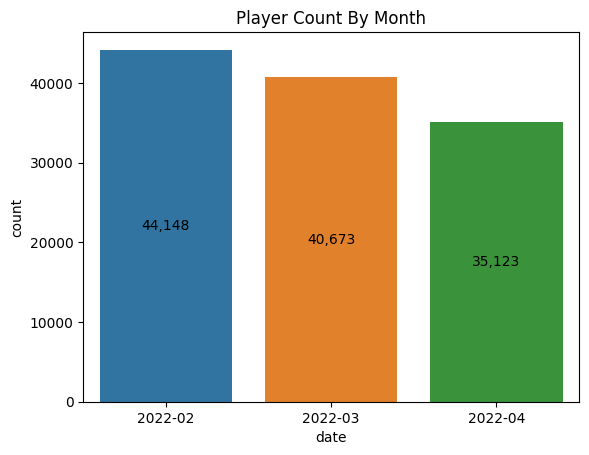

In [17]:
# countplot 사용-! 
# "월별" Player수 변화 시각화 
ax = sns.countplot(data=player_data, x='date')

containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Player Count By Month')
plt.show()

<h2>이번에는 플레이어들이 지불한 금액을 살펴보겠습니다.</h2>

In [18]:
# player_data의 Payment열의 각 개별값을 date열을 기준으로 집계
grouped = player_data['Payment'].groupby(player_data['date']).sum()
groupe

date
2022-02    80841800.0
2022-03    68361200.0
2022-04    43007400.0
Name: Payment, dtype: float64

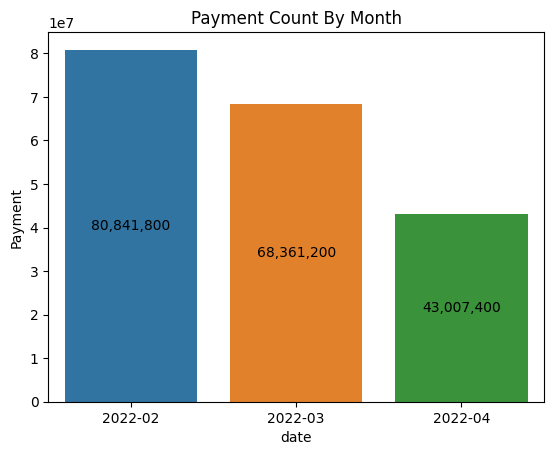

In [19]:
# 집계된 Payment의 값을 시각화
ax = sns.barplot(data=grouped.reset_index(), x='date', y='Payment')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.show()

<h4>빨리 원인을 찾아야할 것 같습니다.
먼저 4월 매출액을 게임별로 구분 해 봅시다.</h4>

In [20]:
# player_data에서 date가 2022-04인 행만 골라서 변수 player_data_04로 할당
player_data_04 = player_data[player_data['date'] == '2022-04']
# player_data_04.head()

# 4월의 Payment값을 Game_Name을 기준으로 집계
grouped = player_data_04['Payment'].groupby(player_data_04['Game_Name']).sum()
grouped

Game_Name
MineGround       21809900.0
SoccerManager    21197500.0
Name: Payment, dtype: float64

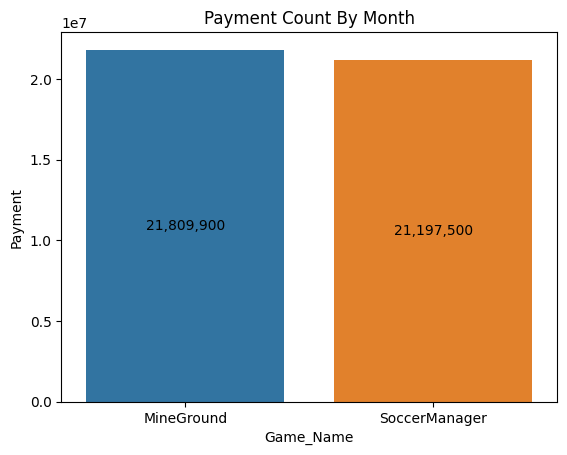

In [21]:
# 집계된 Payment 시각화
ax = sns.barplot(data=grouped.reset_index(), x='Game_Name', y='Payment')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Payment Count By Month')
plt.show()

<h4> 이번에는 일자별로 구분해보겠습니다! </h4>

In [23]:
# 4월의 Payment값을 Game_Name, 일자별로 집계 (Grouped로 Time_stamp와 Game_Name을 묶기!)
grouped = player_data_04['Payment'].groupby([player_data_04['Time_stamp'], player_data_04['Game_Name']]).sum()
grouped.head()

Time_stamp  Game_Name    
2022-04-01  MineGround       2052600.0
            SoccerManager     899700.0
2022-04-02  MineGround       1574200.0
            SoccerManager     618200.0
2022-04-03  MineGround       1603900.0
Name: Payment, dtype: float64

<h4>집계된 결과를 lineplot() 함수를 사용해 시각화해보겠습니다.</h4>

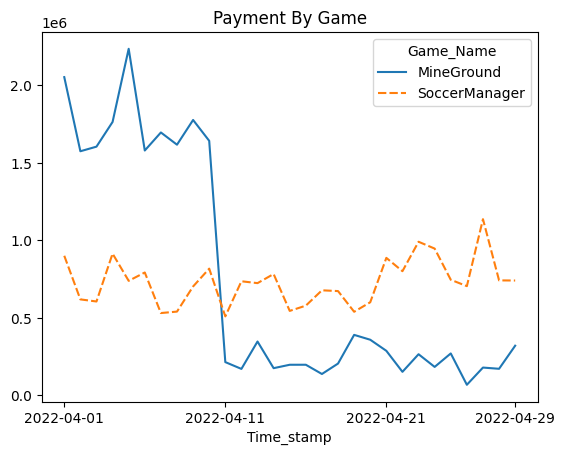

In [25]:
# 집계된 결과를 시각화
ax = sns.lineplot(data=grouped.unstack())
plt.xticks([0,10,20, 28])
plt.title('Payment By Game')
plt.show()

일자별로 시각화해보니까 서서히 문제가 드러나고 있습니다.
**Soccer Manger**는 아주 적지만 서서히 매출이 증가하는 반면,

Mine Ground는 4월 11일자부터 심각한 수준의 **매출급락**이 보이네요.
무슨 일이 있었던걸까요?
결제시스템에 문제가 있었던 것일까요?

<h2>우선 게임별 사용자 숫자를 확인해보도록 하겠습니다.</h2>
지금까지 학습노드에서는 데이터를 집계할 때 groupby()함수를 사용했습니다.<br>
이번에는 crosstab() 함수를 사용해서 집계할 예정입니다.<br>
crosstab()은 결과를 항상 **데이터프레임으로** 반환하기 때문에, 이어서 분석을 수행할 때 groupby()보다 더 쉽게 사용할 수 있습니다.

In [27]:
# 4월 일자별 사용자 숫자를 Game_Name을 기준으로 집계
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Game_Name'])
temp_var.head()

Game_Name,MineGround,SoccerManager
Time_stamp,,
2022-04-01,1256,504
2022-04-02,1209,520
2022-04-03,1230,482
2022-04-04,1215,518
2022-04-05,1221,501


<h4>이번에는 Matplotlib의 plot() 함수를 사용해 집계된 결과를 시각화해 보겠습니다.</h4>

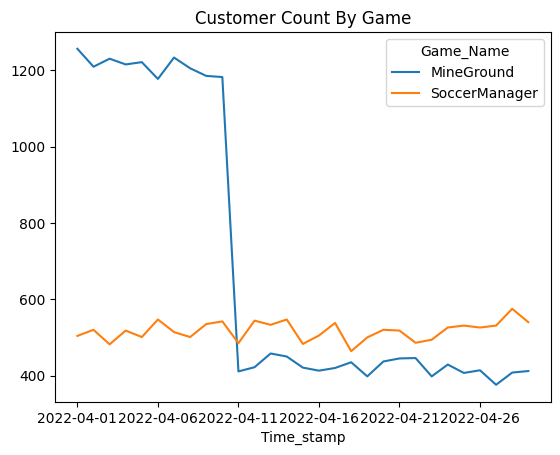

In [28]:
# 집계된 결과를 시각화
temp_var.plot()
plt.title('Customer Count By Game')
plt.show()

<h3>Mine Ground의 고객들을 성별, 연령, 통신사, OS 등 다양한 측면에서 한번 확인해보겠습니다.</h3>


In [29]:
# Mine Ground 고객들만 골라내서 player_data_04변수에 할당하기
player_data_04 = player_data_04[player_data_04['Game_Name'] == 'MineGround']

# 성별에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Gender'])
temp_var.head()

Gender,female,male
Time_stamp,,
2022-04-01,506,750
2022-04-02,485,724
2022-04-03,485,745
2022-04-04,457,758
2022-04-05,468,753


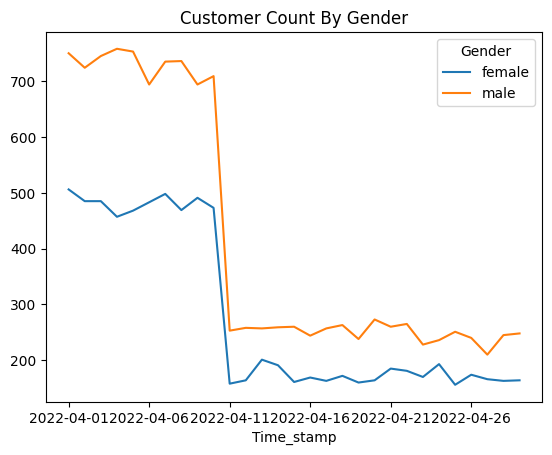

In [30]:
# 집계 결과를 Matplotlib을 사용해 시각해 봅시다.

# 집계 결과 시각화하기 
temp_var.plot()
plt.title('Customer Count By Gender')
plt.show()

이번에는 연령별 고객숫자를 확인해보겠습니다.
<h3>연령(age)을 입력하기 위해서는 '2022년-출생연도'를 계산해야합니다.</h3>

16세부터 41세까지 Mine Ground를 이용하고 있는 고객들의 나이가 계산되었습니다. <br> 
그런데 열 갯수가 많다보니 한눈에 보기 조금 어렵네요.

In [31]:
# 연령별 집계를 위해 age열을 만들고 2022년 기준 날짜 계산해서 할당하기
player_data_04['age'] = 2022 - pd.to_numeric(player_data_04['Birth'].str[:4])

# 연령에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['age'])
temp_var.head()

age,16,17,18,19,20,21,22,23,24,25,...,32,33,34,35,36,37,38,39,40,41
Time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-04-01,15,52,61,37,45,38,38,49,63,53,...,44,61,43,59,55,53,55,46,52,42
2022-04-02,20,40,52,47,52,44,36,61,52,50,...,47,49,43,41,43,46,44,53,48,38
2022-04-03,11,55,48,43,54,51,41,46,46,47,...,59,26,50,50,47,64,40,52,39,43
2022-04-04,10,45,42,48,42,60,38,51,52,48,...,50,51,51,49,55,56,50,53,49,35
2022-04-05,14,49,49,42,51,42,42,43,38,50,...,60,49,53,48,56,52,49,43,48,47


<h3> 연령을 기준으로 10대, 20대, 30대, 40대로 나누어보겠습니다.</h3><br>
어떻게 구간을 나눌지를 결정하기 위해 연령의 기술통계량을 확인해 보겠습니다.

In [34]:
# 연령의 기술통계량 확인하기 (최소가 16 최대가 41)
player_data_04['age'].describe()

count    20113.000000
mean        28.851787
std          7.238312
min         16.000000
25%         23.000000
50%         29.000000
75%         35.000000
max         41.000000
Name: age, dtype: float64

<h3>Pandas의 cut()함수를 이용해 구간을 나누도록 하겠습니다.</h3>

In [35]:
# 세대 구간을 위한 초기값 입력

# 16세이상~20세 미만, 20세 이상~30세 미만 등으로 구분합니다. 
bins = [16, 20, 30, 40, 50] 

# 각 구간의 이름을 정의합니다. 
bins_label = ['10', '20', '30', '40']

# player_data_04에 Generation열을 입력하고, 각 구간별 나이에 맞는 집계 결과를 반영합니다. 
player_data_04['Generation'] = pd.cut(player_data_04['age'], bins,right=False, labels=bins_label)

# 세대에 따른 일자 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['Generation'])
temp_var.head()

Generation,10,20,30,40
Time_stamp,,,,
2022-04-01,165,476,521,94
2022-04-02,159,500,464,86
2022-04-03,157,499,492,82
2022-04-04,145,486,500,84
2022-04-05,154,467,505,95


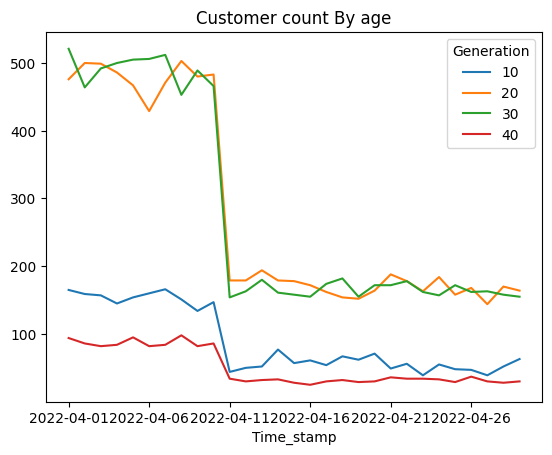

In [36]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By age')
plt.show()

<h3>이번에는 고객들의 통신사(MobileCompany)를 살펴보겠습니다.</h3>

In [37]:
# 통신사를 기준으로 일자별 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['MobileCompany'])
temp_var.head()

MobileCompany,KT,LGU,MVNO,SKT
Time_stamp,,,,
2022-04-01,329,252,140,535
2022-04-02,308,217,108,576
2022-04-03,306,207,124,593
2022-04-04,312,242,101,560
2022-04-05,325,224,130,542


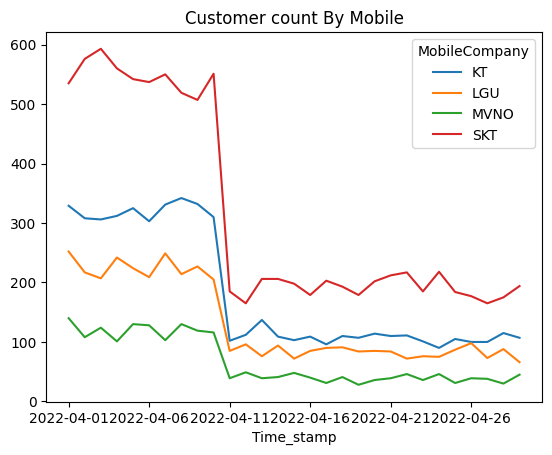

In [38]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By Mobile')
plt.show()

<h3>단말기의 OS를 한번 확인해보겠습니다.</h3>

In [39]:
# OS에 따른 일자별 고객 숫자 집계하기
temp_var = pd.crosstab(player_data_04['Time_stamp'], player_data_04['OS'])
temp_var.head()

OS,Android,iOS
Time_stamp,,
2022-04-01,744,512
2022-04-02,736,473
2022-04-03,741,489
2022-04-04,745,470
2022-04-05,729,492


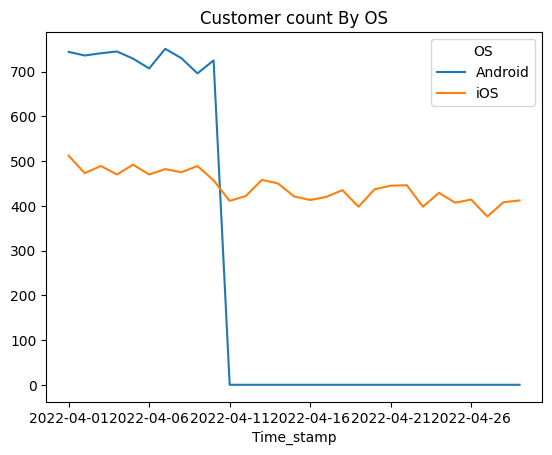

In [40]:
# 집계 결과 시각화하기
temp_var.plot()
plt.title('Customer count By OS')
plt.show()

드디어 원인을 발견한것 같네요. <br>
4월 11일을 기준으로 iOS를 사용하는 고객 수는 일정하게 유지되고 있는 반면, Android를 사용하는 고객 수는 0입니다. <br>
특별한 기술적 문제가 있는게 아니라면 현실적으로 불가능합니다.